## **Linear Regression Model**

The objective of this problem is build a model to predict the salary based on the years of experience of an employee. This could be useful in case a new person enters in the firm and the Human Resources staff does not have any salary policy.

This problem resolution is going to be organized in the following sections:
* **Section 1** - Data analysis and insights
* **Section 2** - Getting the training set and the test set
* **Section 3** - Getting the Model
* **Section 4** - Conclusion

### **Section 1 - Data Analysis and insights**

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("../input/salary-data-simple-linear-regression/Salary_Data.csv")

In [6]:
#showing the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


As can be noticed in the dataframe information, there is no null values. So, it won't be necessary any data processing to care of null-values.

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
#show the main statistics informations of the dataframe
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


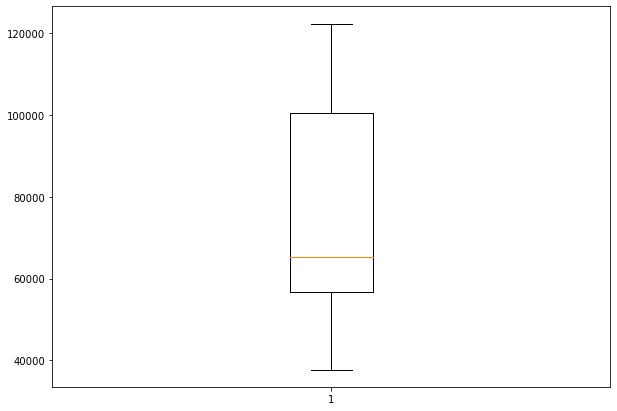

In [14]:
  
# Creating dataset 

data = df.iloc[:, -1]
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(data) 
  
# show plot 
plt.show() 

No outlier is present in the dataframe. Proceeding to get the suitable model to the data.

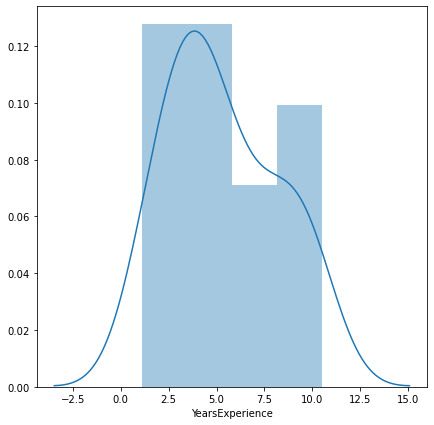

In [15]:
#Showing the distribution
plt.rcParams['figure.figsize'] = [7, 7]
sns.distplot(df['YearsExperience'])

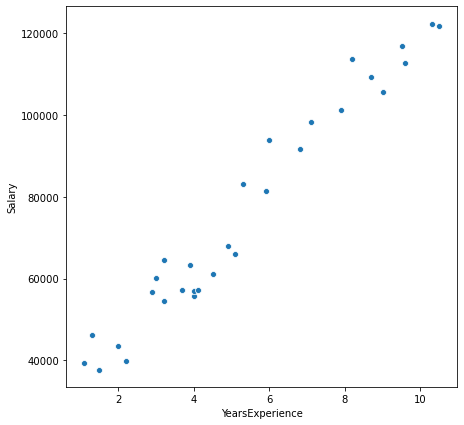

In [20]:
#Showing the values and how they are scattered
sns.scatterplot(x = "YearsExperience", y = "Salary", data = df)

In [22]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


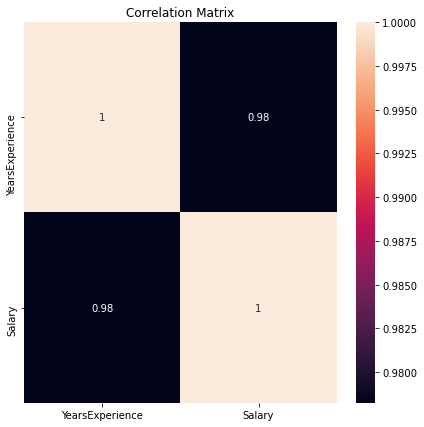

In [21]:
#Show the correlation matrix
plt.title("Correlation Matrix")
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(df.corr(), annot = True)

There is a strong linear relationship and a high correlation between the dependent and independent variable. Thus, the model to use to predict future salaries based on the years of experience will be the linear regression.

### **Section 2 - Getting the training set and the test set**

In [23]:
#Splitting the dataset into the dependent and independent variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [25]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [26]:
#splitting the data into the training set and the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### **Section 3 - Getting the Model**

In [27]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
#getting the score of the regression
regressor.score(x_train, y_train)

0.9556538622283381

0.951012 is an excelent score for a linear regression

In [30]:
#Getting the coeficients of the linear regression
print("Salary = " + str(regressor.intercept_) + " + YearsExperience*" + 
     str(regressor.coef_[0]))

Salary = 22901.21788609012 + YearsExperience*10029.149121250988


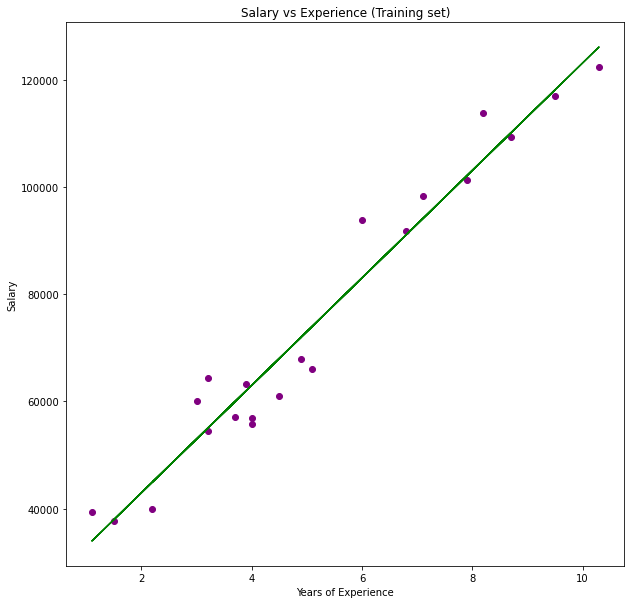

In [31]:
#Visualizing the training set results
plt.scatter(x_train, y_train, color="purple")
plt.plot(x_train, regressor.predict(x_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

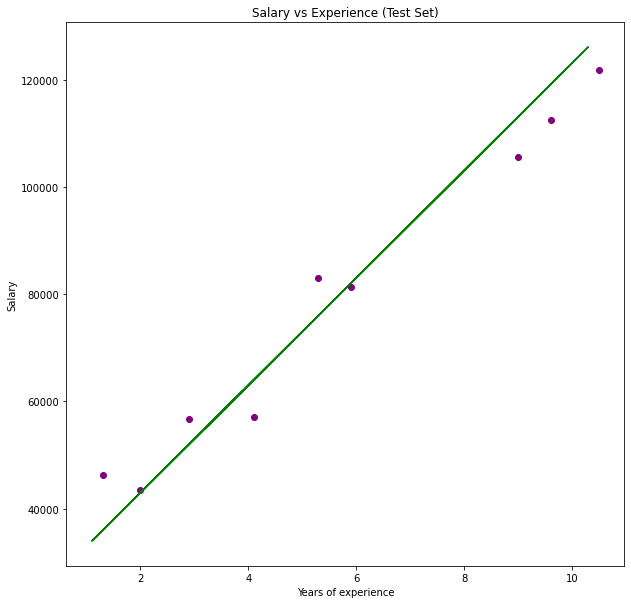

In [32]:
#Visualizing the test set results
plt.scatter(x_test, y_test, color = "purple")
plt.plot(x_train, regressor.predict(x_train), color = "green")
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [33]:
#Show some relevant informations about the linear regression
y_pred = regressor.predict(x_test)
print("R2 value is " + str(r2_score(y_test, y_pred)))
print("The Mean Squared Error is " + str(mean_squared_error(y_test, y_pred)))

R2 value is 0.9478041009681678
The Mean Squared Error is 40663653.28987956


### **Section 4 - Conclusion**

ThThe R2 value showed that the accuracy of the results, measured by the predicted value and tested value, was 94.7% which is useful to general purposes. 